In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1
samples = [rng() for _ in range(10000)]
print(samples)

[0.25693503906950355, 0.5878706516232342, 0.15432575810700655, 0.767266943352297, 0.9738139626570046, 0.5858681506942958, 0.8511155843734741, 0.6132153405342251, 0.7473867232911289, 0.06236015981994569, 0.04194940160959959, 0.1948235605377704, 0.1386128985323012, 0.6840353596489877, 0.49171859584748745, 0.7676989699248224, 0.8828409514389932, 0.8232365751173347, 0.8835694054141641, 0.8901184604037553, 0.9114757110364735, 0.5759661465417594, 0.3127383701503277, 0.15734241367317736, 0.1734505402855575, 0.45860223821364343, 0.2598799681290984, 0.7005771037656814, 0.3033791915513575, 0.8927010844927281, 0.9657614398747683, 0.9349605368915945, 0.9332623495720327, 0.337260173400864, 0.8791998000815511, 0.7909467287827283, 0.1946238619275391, 0.6778173677157611, 0.6001160368323326, 0.41346341953612864, 0.7079516570083797, 0.23176096356473863, 0.4895814983174205, 0.06321822595782578, 0.10631834948435426, 0.4792256865184754, 0.8687314670532942, 0.7045282314065844, 0.8900565332733095, 0.37894962

### Problem 1
Implement serial test and apply to a `samples`

In [15]:
def serial_test(samples):
    length = 2
    tuples = list(zip(*[samples[i::length] for i in range(length)]))
    x1 = samples[0::length] #1-ая коорда каждой пары
    y1 = samples[1::length] #2-ая
    tuples

    j = 20 # разбиваем на 20*20=400 бинов гистограмму
    hist, _, _ = np.histogram2d(x1, y1, bins=np.linspace(0, 1, j + 1))

    # подготовка данных для теста хи-квадрат
    f_observed = hist.flatten()
    f_expected = np.full(j * j, len(tuples) / (j * j))

    #cам тест
    print(stats.chisquare(f_observed, f_expected))

serial_test(samples) #Power_divergenceResult(statistic=np.float64(391.2), pvalue=np.float64(0.6003664860752091))
#p-value < 0.05: Результат считается статистически значимым. Это означает, что наблюдаемые данные маловероятны 
# при условии истинности нулевой гипотезы. Вывод: нулевую гипотезу отвергают(Н0: данные распределены равномерно), данные не равномерны.

#p-value >= 0.05: Результат считается не статистически значимым. Это означает, что наблюдаемые данные вполне вероятны
# при условии истинности нулевой гипотезы. Вывод: нулевую гипотезу не отвергают, данные могут быть равномерны.

#статистика измеряет, насколько наблюдаемые данные отклоняются от ожидаемых. Чем больше значение χ², тем больше отклонение.

Power_divergenceResult(statistic=np.float64(366.4), pvalue=np.float64(0.8776417239155498))


### Problem 2
Implement permutation test and apply to a `samples`

In [4]:
import itertools

In [5]:
def permutation_test(samples, d):
    #проверка длины последовательности
    n = len(samples) / d
    if len(samples) % d != 0:
        raise ValueError("length of samples % d = 0!")
    n = int(n)

    all_orders = list(itertools.permutations(range(d))) #генерация всех возможных перестановок длины d
    
    #определение порядка последовательности
    def order_of_seq(seq):
        sort_indici = np.argsort(seq)
        return all_orders.index(tuple(sort_indici))
    
    #подсчет частот перестановок
    num_of_orders = len(all_orders)
    freq = np.zeros(num_of_orders)
    for i in range(n):
        seq = samples[i*d:(i+1)*d]
        order = order_of_seq(seq)
        freq[order] += 1
    
    #подготовка данных для теста хи-квадрат
    f_exp2 = np.full(num_of_orders, n/num_of_orders)
    f_obs2 = freq
    f_exp2 *= np.sum(f_obs2) / np.sum(f_exp2)
    print(stats.chisquare(f_obs2, f_exp2))
permutation_test(samples, 10)
#Этот тест помогает проверить качество генератора псевдослучайных чисел с точки зрения порядка следования чисел. 
#Если генератор действительно выдает случайные числа, то все возможные порядки элементов в подмножествах должны встречаться с одинаковой частотой. 
#Если тест выявляет значительные отклонения, это может указывать на проблемы с генератором.

Power_divergenceResult(statistic=np.float64(3628699.999999982), pvalue=np.float64(0.5145586770555511))


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [19]:
n = 1000
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1
random_good = [rng() for _ in range(n)]

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random_bad = [rng_bad() for _ in range(n)]

In [20]:
def rng_test(random,k):
    f_exp34 = np.full(k, n / k)
    f_obs34 = np.histogram(random, np.linspace(0, 1, k+1))[0]
    f_exp34 *= np.sum(f_obs34) / np.sum(f_exp34)
    _, pvalue = stats.chisquare(f_obs34, f_exp34)
    return _,pvalue
a = [rng_test(random_bad, k)[1] for k in range(2, n)]
min_p = np.min(a)
ind_p = a.index(min_p)

print(rng_test(random_bad, ind_p-1))
print(rng_test(random_good, ind_p-1))
print('\n')
print(stats.kstest(random_bad, stats.uniform.cdf))
print(stats.kstest(random_good, stats.uniform.cdf))
print('\n')
permutation_test(random_bad, 5)
permutation_test(random_good, 5)
print('\n')
serial_test(random_bad)
serial_test(random_good)


(np.float64(43.956), np.float64(0.048132736557325216))
(np.float64(26.348000000000003), np.float64(0.6572564379037878))


KstestResult(statistic=np.float64(0.03373850460723038), pvalue=np.float64(0.20048846153312472), statistic_location=np.float64(0.5847385046072304), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.0283867232911289), pvalue=np.float64(0.3887430856707226), statistic_location=np.float64(0.7473867232911289), statistic_sign=np.int8(-1))


Power_divergenceResult(statistic=np.float64(98.79999999999998), pvalue=np.float64(0.9111570692912826))
Power_divergenceResult(statistic=np.float64(115.6), pvalue=np.float64(0.5711054902086632))


Power_divergenceResult(statistic=np.float64(456.79999999999995), pvalue=np.float64(0.02395205738027778))
Power_divergenceResult(statistic=np.float64(391.2), pvalue=np.float64(0.6003664860752091))


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

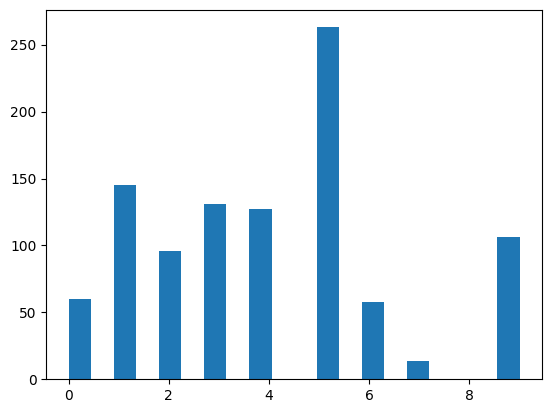

In [21]:
sample = np.random.rand(1000)
sample_result = []

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
total_weight = np.sum(weights)
weights = weights/total_weight

#distribution_dict = {k: 0 for k in range(0,10)}

intervals = []
temp = 0
for k in range(0,10):
    intervals.append((temp, temp + weights[k]))
    temp += weights[k]

for x in sample:
    for i in range(0,10):
        if x >= intervals[i][0] and x < intervals[i][1]:
            #distribution_dict[i]+=1
            sample_result.append(i)

#freqs = distribution_dict.values()
#print(freqs)
plt.hist(sample_result,bins=20)
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

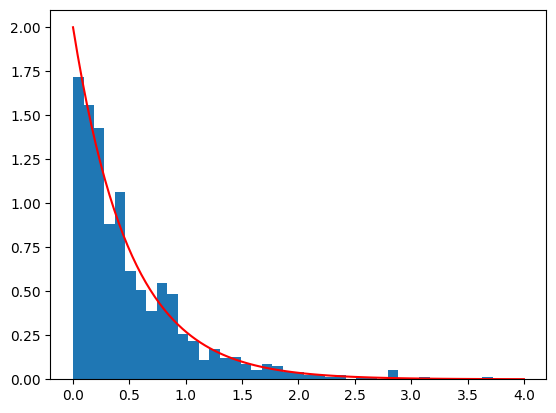

In [66]:
from scipy.stats import expon

lam = 2
def exp_distribution(n, lam):
    sample = np.random.rand(n)
    sample_result = -np.log(1-sample)/lam
    return sample_result

exp_sample = exp_distribution(1000, lam)

x = np.linspace(0, 4,100)
y = expon.pdf(x, scale = 1/lam)
plt.plot(x, y,'r-')
plt.hist(exp_sample, bins=40, density=True)
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

насчет orally: ну так если мы задаем выборку с равномерным распеределением, то есть в каждой точке плотность равна какой-то константе, то тупа ограничивая площадь мы не поменяем это самое значение.

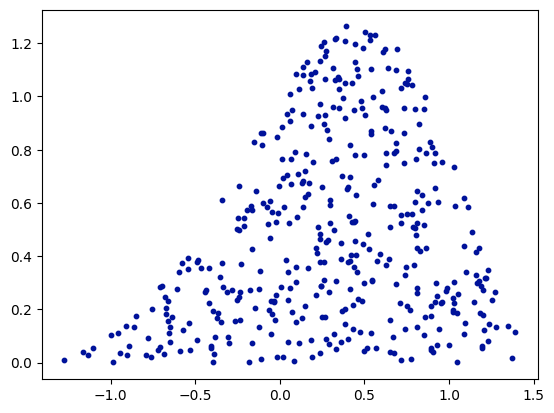

In [59]:
from scipy.optimize import minimize_scalar

def f(x):
    return -np.exp(x) * np.cos(x) ** 2

max_of_dens = minimize_scalar(f, bounds=(-np.pi/2, np.pi/2), method='bounded')
x_values = np.random.rand(1000) * np.pi - np.pi / 2
y_values = np.random.rand(1000) * (-max_of_dens.fun)
uni_square = np.array(list(zip(x_values, y_values)))

dens_sample = np.array([(x, y) for (x,y) in uni_square if -f(x) > y])
plt.scatter(dens_sample[:,0].ravel(), dens_sample[:, 1].ravel(), color = '#00129A', s = 10)
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

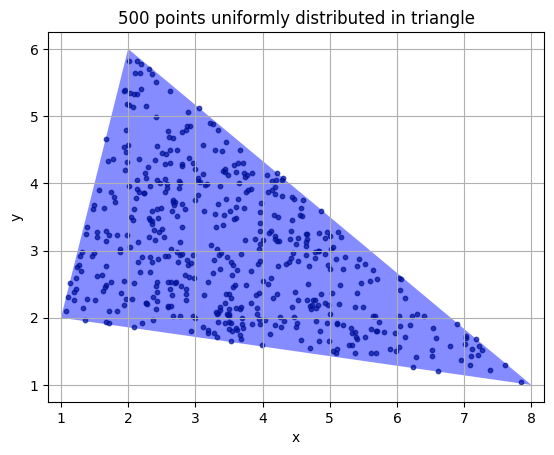

In [49]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

v1 = np.array([1, 2])
v2 = np.array([2, 6])
v3 = np.array([8, 1])

N = 500
r1 = np.random.rand(N)
r2 = np.random.rand(N)

#Барицентрические коорды
alpha = 1 - np.sqrt(r1) #корень для того, чтобы плотность была константой
beta = r2 * np.sqrt(r1)
gamma = (1 - r2)* np.sqrt(r1)

points = alpha[:, np.newaxis] * v1 + beta[:, np.newaxis] * v2 + gamma[:, np.newaxis] * v3

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), facecolor='#858CFF', closed=True)
#plt.gca().add_collection(PatchCollection([polygon]))
plt.gca().add_patch(polygon) 
plt.axis('equal')
plt.scatter(points[:, 0], points[:, 1], s=10, color='#00129A', alpha=0.7)

plt.title('500 points uniformly distributed in triangle')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Problem 8 ****************
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

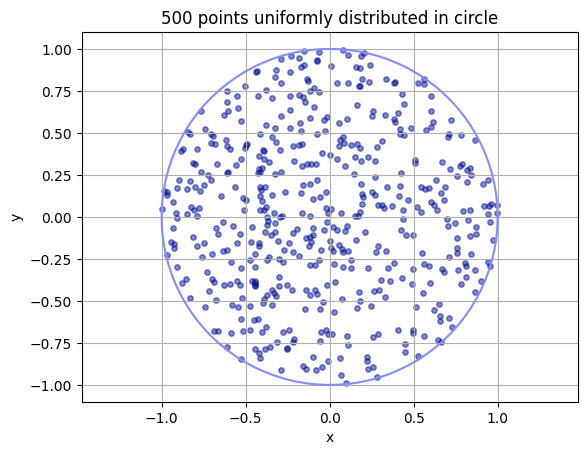

In [52]:
N = 500

u1 = np.random.rand(N)
u2 = np.random.rand(N)

#Полярные координаты
r = np.sqrt(u1) #корень для равномерности
phi = 2 * np.pi * u2

x = r * np.cos(phi)
y = r * np.sin(phi)

plt.scatter(x, y, s=15, color='#00129A', alpha=0.5)
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(t), np.sin(t),color = '#858CFF')
plt.axis('equal')
plt.title('500 points uniformly distributed in circle')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

насчет orally: как устно не знаю, можно хар функцию посчитать - так быстрее и надежнее получится

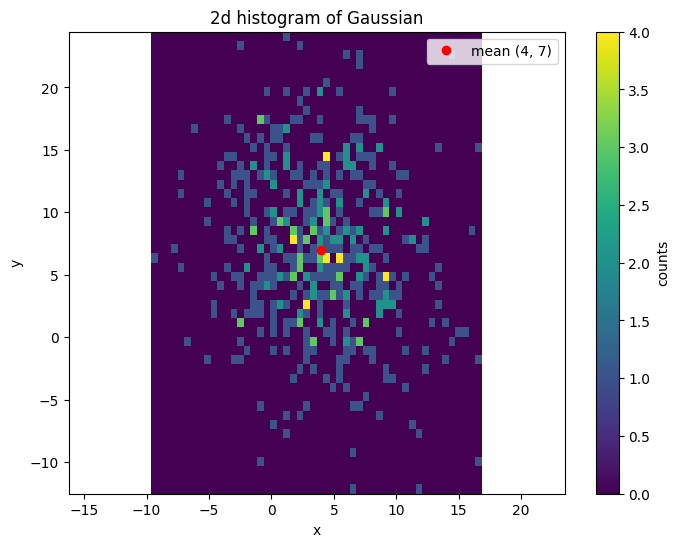

mean: [3.94047186 7.13067849]
covariance:
 [[19.94590923 -3.98209735]
 [-3.98209735 39.88180876]]
true mean: [4 7]
true covariance:
 [[20 -4]
 [-4 40]]


In [74]:
N = 500
n_pairs = N // 2

Z = []
while len(Z) < N:
    x, y = np.random.rand(2) * 2 - 1
    s = x**2 + y**2
    if 0 < s < 1:
        w = np.sqrt(-2 * np.log(s) / s)
        Z.append([x * w, y * w])
        Z.append([y * w, -x * w])

Z = np.array(Z[:N])

sigma = np.array([[20, -4], [-4, 40]])
A = np.linalg.cholesky(sigma)
mu = np.array([4, 7])

X = mu + Z @ A.T

plt.figure(figsize=(8, 6))
plt.hist2d(X[:, 0], X[:, 1], bins=50, cmap='viridis')
plt.colorbar(label='counts')
plt.plot(mu[0], mu[1], 'ro', label='mean (4, 7)')
plt.title('2d histogram of Gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()

sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X.T)
print("mean:", sample_mean)
print("covariance:\n", sample_cov)
print("true mean:", mu)
print("true covariance:\n", sigma)